Max f1 score:  0.7108199902959728
Precision:  0.9173450219160927
Recall:  0.5801980198019802
Detection Confidence:  0.5


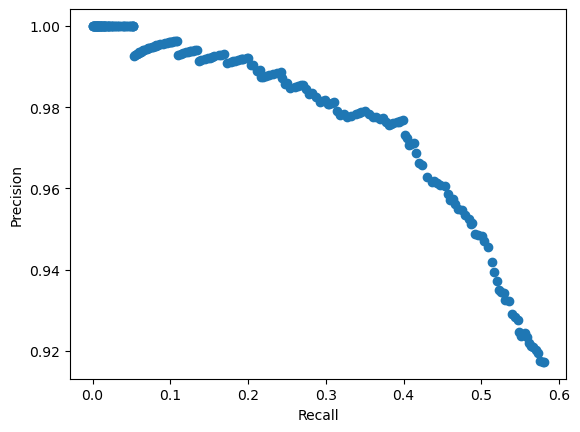

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_table("/Users/shahnazmohideen/ExampleUBNAFiles/recover-20220828/central_pond/human2-UBNA_010_20220826_070000.txt")
data2 = data[data['View'] == 'Waveform 1']

if data2['detection_confidence'].isnull().values.any():
    data2_human = data2[data2['detection_confidence'].isnull()]
    data2_bd2 = data2[data2['detection_confidence'].notna()]
else:
    data2_human = data2[data2['Annotation'].isnull()]
    data2_bd2 = data2[data2['Annotation'].notna()]

annotations = data2_bd2.loc[:, "Annotation"].values.tolist()
detection_confidence = data2_bd2.loc[:, "detection_confidence"]
values = detection_confidence.drop_duplicates().values.tolist()
detection_confidence = detection_confidence.values.tolist()
values.sort()

tp = []
fp = []
fn = []
precision = []
recall = []
maxf1 = 0
maxf1_precision = 0
maxf1_recall = 0
maxf1_dc = 0
for value in values:
    tp_count = 0
    fp_count = 0
    fn_count = len(data2_human.index)
    for i in range(len(detection_confidence)):
        if detection_confidence[i] >= value:
            if annotations[i] == 'Echolocation':
                tp_count = tp_count + 1
            else:
                fp_count = fp_count + 1
        else:
            if annotations[i] == 'Echolocation':
                fn_count = fn_count + 1
    tp.append(tp_count)
    fp.append(fp_count)
    fn.append(fn_count)
    precision_value = tp_count / (tp_count + fp_count)
    recall_value = tp_count / (tp_count + fn_count)
    precision.append(precision_value)
    recall.append(recall_value)
    if precision_value == 0 and recall_value == 0:
        f1 = 0
    else:
        f1 = 2*((precision_value * recall_value)/(precision_value + recall_value))
    if f1 > maxf1:
        maxf1 = f1
        maxf1_precision = precision_value
        maxf1_recall = recall_value
        maxf1_dc = value
    



plt.scatter(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

print("Max f1 score: ", maxf1)
print("Precision: ", maxf1_precision)
print("Recall: ", maxf1_recall)
print("Detection Confidence: ",  maxf1_dc)